## imports
importing essential libraries

In [3]:
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools


import matplotlib.pyplot as plt
%matplotlib inline


from nltk.corpus import stopwords
from nltk.corpus import twitter_samples
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
from collections import Counter
from  nltk.stem import SnowballStemmer

import nltk
import pandas as pd
import gensim

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score, plot_confusion_matrix,plot_roc_curve
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
load_dotenv("nltkTweets/.env")

True

##### Downloading the twitter data from NLTK corpus and creating csv file and dataframe

In [5]:

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

##### Reading downloaded tweets from json files 

In [6]:
positive = twitter_samples.strings('positive_tweets.json')
negative = twitter_samples.strings('negative_tweets.json')
all_tweets = twitter_samples.strings("tweets.20150430-223406.json")

##### Creating dataframe from downloaded tweets

In [7]:
positive_df=pd.DataFrame(positive,columns=["Tweets"])
negative_df=pd.DataFrame(negative,columns=["Tweets"])
alltweets_df=pd.DataFrame(all_tweets,columns=["Tweets"])
positive_df['Label']='positive'
negative_df['Label']='negative'

##### Creating a single dataframe for positive, negative tweets

In [8]:
frames=[positive_df,negative_df]
posNeg_tweets=pd.concat(frames)

In [9]:
posNeg_tweets

,Tweets,Label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive
2,@DespiteOfficial we had a listen last night :)...,positive
3,@97sides CONGRATS :),positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive
...,...,...
4995,I wanna change my avi but uSanele :(,negative
4996,MY PUPPY BROKE HER FOOT :(,negative
4997,where's all the jaebum baby pictures :((,negative
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative


##### Downloading stopwords from nltk library

In [10]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Visualization of the distribution of the tweets

Text(0.5, 1.0, 'Distribuition of Labels in the dataset')

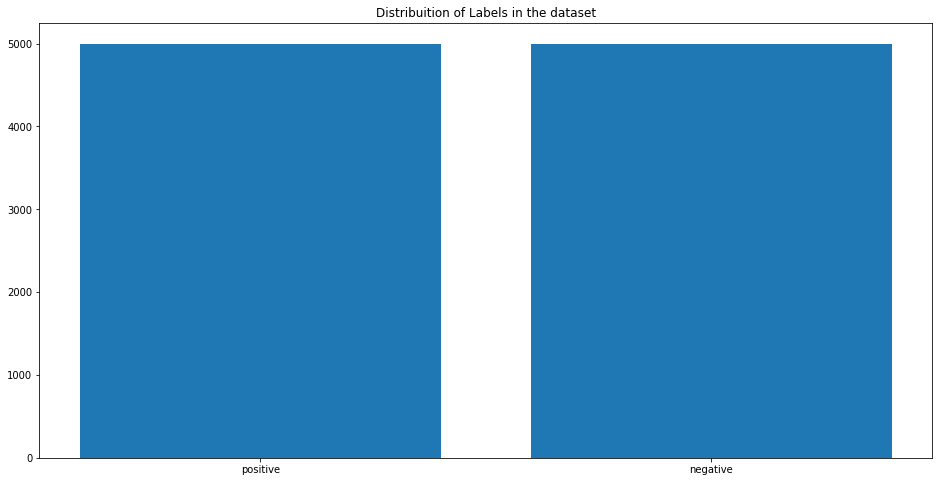

In [11]:

label_count = Counter(posNeg_tweets.Label)
label_count
plt.figure(figsize=(16,8))
plt.bar(label_count.keys(), label_count.values())
plt.title("Distribuition of Labels in the dataset")

## Preprocessing 

##### User-defined function for cleaning tweets

In [12]:

def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

##### Cleaning tweets and making a new column for the cleaned tweets

In [13]:

posNeg_tweets['cleaned Tweets']=posNeg_tweets['Tweets'].apply(lambda x: clean_text(x))

In [14]:
posNeg_tweets

,Tweets,Label,cleaned Tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive,followfriday france inte milipol paris for b...
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive,hey james how odd please call our contact ce...
2,@DespiteOfficial we had a listen last night :)...,positive,despiteofficial we had a listen last night as...
3,@97sides CONGRATS :),positive,congrats
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive,yeaaaah yippppy my accnt verified rqst has suc...
...,...,...,...
4995,I wanna change my avi but uSanele :(,negative,i wanna change my avi but usanele
4996,MY PUPPY BROKE HER FOOT :(,negative,my puppy broke her foot
4997,where's all the jaebum baby pictures :((,negative,where s all the jaebum baby pictures
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,but but mr ahmad maslan cooks too


##### Visualization using wordcloud for the positive tweets

In [15]:

from wordcloud import WordCloud,STOPWORDS

df=posNeg_tweets[posNeg_tweets['Label']=='positive']
words = ' '.join(df['cleaned Tweets'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word)



##### Generating wordcloud from tweets

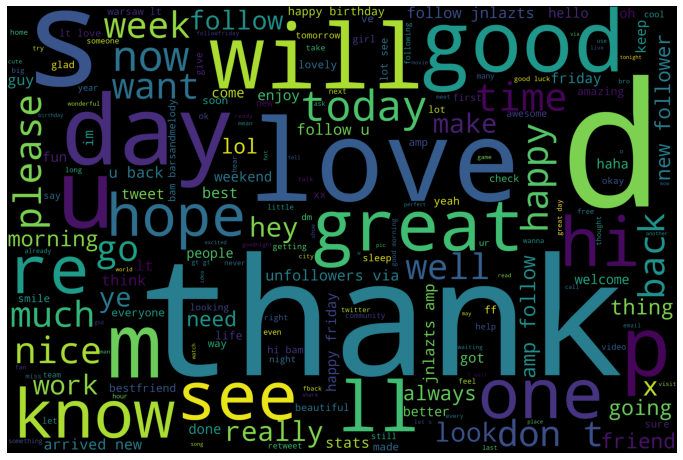

In [16]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Encoding labels

In [17]:
posNeg_tweets['Sentiment']=posNeg_tweets['Label'].apply(lambda x: 0 if x=='negative' else 1)
posNeg_tweets.tail()

,Tweets,Label,cleaned Tweets,Sentiment
4995,I wanna change my avi but uSanele :(,negative,i wanna change my avi but usanele,0
4996,MY PUPPY BROKE HER FOOT :(,negative,my puppy broke her foot,0
4997,where's all the jaebum baby pictures :((,negative,where s all the jaebum baby pictures,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,but but mr ahmad maslan cooks too,0
4999,@eawoman As a Hull supporter I am expecting a ...,negative,eawoman as a hull supporter i am expecting a ...,0


In [18]:
posNeg_tweets

,Tweets,Label,cleaned Tweets,Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive,followfriday france inte milipol paris for b...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive,hey james how odd please call our contact ce...,1
2,@DespiteOfficial we had a listen last night :)...,positive,despiteofficial we had a listen last night as...,1
3,@97sides CONGRATS :),positive,congrats,1
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive,yeaaaah yippppy my accnt verified rqst has suc...,1
...,...,...,...,...
4995,I wanna change my avi but uSanele :(,negative,i wanna change my avi but usanele,0
4996,MY PUPPY BROKE HER FOOT :(,negative,my puppy broke her foot,0
4997,where's all the jaebum baby pictures :((,negative,where s all the jaebum baby pictures,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,but but mr ahmad maslan cooks too,0


##### Splitting the dataset into train and test set

In [19]:
train,test = train_test_split(posNeg_tweets,test_size=0.2,random_state=42)

In [20]:
train.Sentiment.value_counts()

0    4012
1    3988
Name: Sentiment, dtype: int64

##### Appending tweets to train and test list

In [21]:
train_tweet=[]
for tweet in train['cleaned Tweets']:
    train_tweet.append(tweet)
test_tweet=[]
for tweet in test['cleaned Tweets']:
    test_tweet.append(tweet)

##### Feature extraction from tweets using Count Vectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_tweet)
test_features=v.transform(test_tweet)

##### Visualizing the corpus after countvectorizer 

In [23]:

pd.DataFrame(train_features.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(train_tweet))],
            columns=v.get_feature_names())

,aa,aaaaaand,aaaaahhhhhhhh,aaaahh,aaaahhh,aaahhh,aah,aahliyahr,aaj,aaliyuhx,...,zulbayarb,zy,zynovftw,zyrophobia,zysuzyy,zz,zzz,zzzterror,zzzz,zzzzzz
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 7997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 7998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 7999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train_features

<8000x14614 sparse matrix of type '<class 'numpy.float64'>'
	with 43394 stored elements in Compressed Sparse Row format>

##### Creating dense matrix

In [ ]:

dense_features=train_features.toarray() 
dense_test= test_features.toarray()

## Developing Machine Learning Models


##### Initializing classifiers

In [55]:

MLclassifiers = [
    LogisticRegression(C=0.0000001,max_iter=200),
    KNeighborsClassifier(5),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]


##### Developing all the models and printing their accuracy and other evaluation metrics

Accuracy of LogisticRegression is 0.494
Classification Report of LogisticRegression
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       988
           1       0.00      0.00      0.00      1012

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000

Confusion matrix : 
[[ 988    0]
 [1012    0]]
ROC_AUC = 0.5


C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa




Accuracy of KNeighborsClassifier is 0.6835
Classification Report of KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.64      0.81      0.72       988
           1       0.75      0.56      0.64      1012

    accuracy                           0.68      2000
   macro avg       0.70      0.69      0.68      2000
weighted avg       0.70      0.68      0.68      2000

Confusion matrix : 
[[801 187]
 [446 566]]
ROC_AUC = 0.6850086412443392



Accuracy of SVC is 0.771
Classification Report of SVC
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       988
           1       0.81      0.72      0.76      1012

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000

Confusion matrix : 
[[817 171]
 [287 725]]
ROC_AUC = 0.7716631194892064



Accuracy of DecisionTreeClassifier is 0.7035
Cla

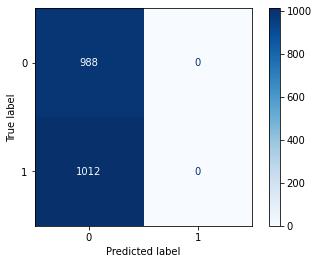

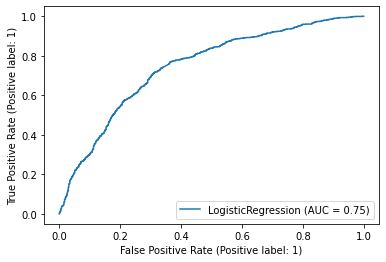

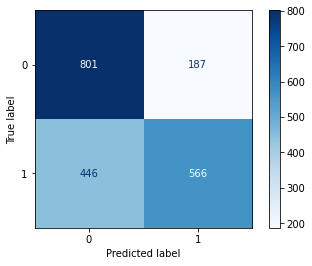

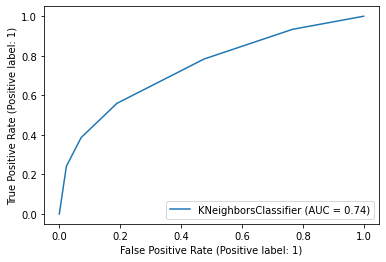

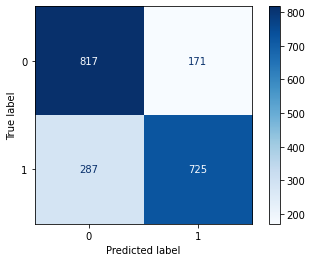

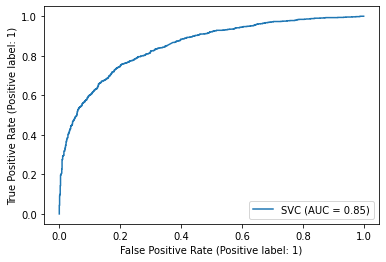

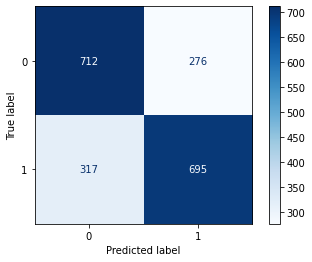

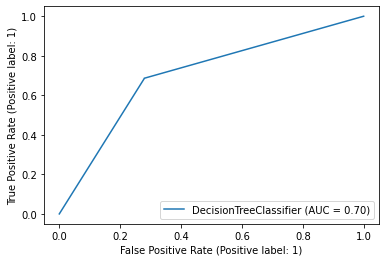

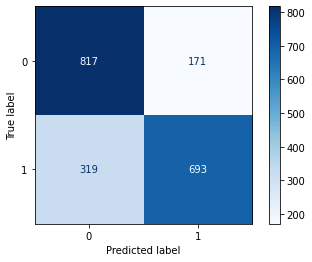

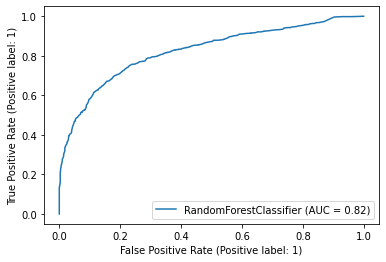

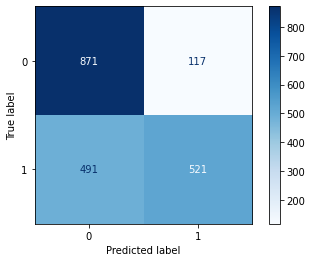

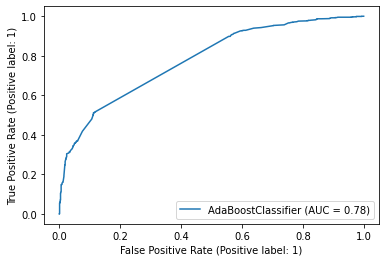

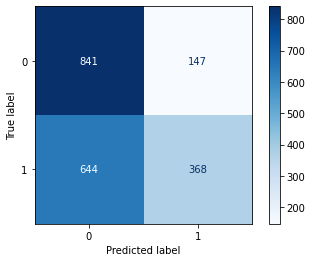

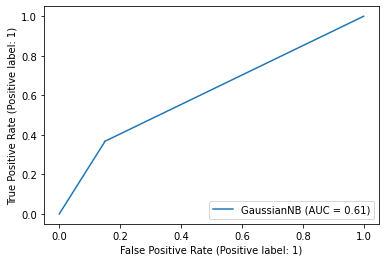

In [58]:
accuracy_scores=[]
models=[]

for classifier in MLclassifiers:
    #Using sparse and dense matrix to train and test
    try:
        clf = classifier.fit(train_features,train['Sentiment'])
        pred = clf.predict(test_features)
    except Exception:
        clf = classifier.fit(dense_features,train['Sentiment'])
        pred = clf.predict(dense_test)
        
    accuracy = accuracy_score(test['Sentiment'], pred)
    accuracy_scores.append(accuracy)
    models.append(classifier.__class__.__name__)
    
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  
   
    print('Classification Report of '+classifier.__class__.__name__+"\n",classification_report(test['Sentiment'], pred))
    
    #printing accuracy scores, confusion matrix, ROC_AUC, plotting ROC curve and confusion matrix for all the developed models and tested on test set
    try:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        plot_confusion_matrix(clf, test_features, test['Sentiment'],cmap=plt.cm.Blues)
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(clf, test_features, test['Sentiment'])
    except:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        plot_confusion_matrix(clf, dense_test, test['Sentiment'],cmap=plt.cm.Blues)
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(clf, dense_test, test['Sentiment'])
    print("\n\n")

##### Bar chart showing the accuracy of all developed models

Text(0.5, 1.0, 'Accuracy scores of Models')

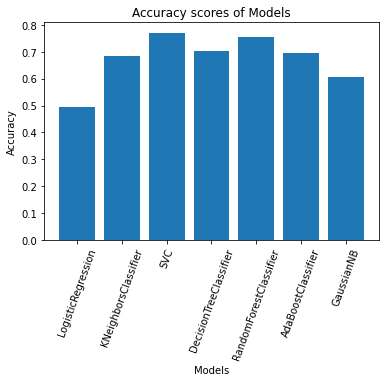

In [60]:

plt.bar(models,accuracy_scores)
plt.xticks(models, rotation=70)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy scores of Models')

##### Developing model using SGd classifier

In [31]:

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(dense_features,train['Sentiment'])


pred = clf.predict(dense_test)
print(accuracy_score(test['Sentiment'], pred))

0.6525


##### Using tf-idf for feature extraction

In [61]:

from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(min_df=1, stop_words='english')
train_features= tf.fit_transform(train_tweet)
test_features=tf.transform(test_tweet)


##### Visualizing the corpus after tfidf  vectorizer

In [ ]:
 
pd.DataFrame(train_features.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(train_tweet))],
            columns=tf.get_feature_names())

##### Creating dense matrix of the features

In [ ]:

dense_features=train_features.toarray()
dense_test= test_features.toarray()

Accuracy of LogisticRegression is 0.494
Classification Report of LogisticRegression
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       988
           1       0.00      0.00      0.00      1012

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000

Confusion matrix : 
[[ 988    0]
 [1012    0]]
ROC_AUC = 0.5





C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy of KNeighborsClassifier is 0.5755
Classification Report of KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.55      0.78      0.65       988
           1       0.64      0.37      0.47      1012

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.56      2000
weighted avg       0.59      0.58      0.56      2000

Confusion matrix : 
[[774 214]
 [635 377]]
ROC_AUC = 0.5779652269926869



Accuracy of SVC is 0.7445
Classification Report of SVC
               precision    recall  f1-score   support

           0       0.72      0.80      0.76       988
           1       0.78      0.69      0.73      1012

    accuracy                           0.74      2000
   macro avg       0.75      0.75      0.74      2000
weighted avg       0.75      0.74      0.74      2000

Confusion matrix : 
[[792 196]
 [315 697]]
ROC_AUC = 0.7451773055319967



Accuracy of DecisionTreeClassifier is 0.702
Classi

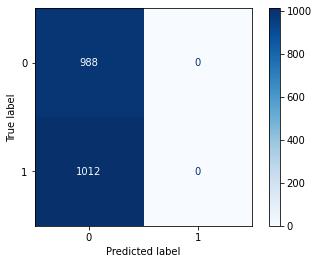

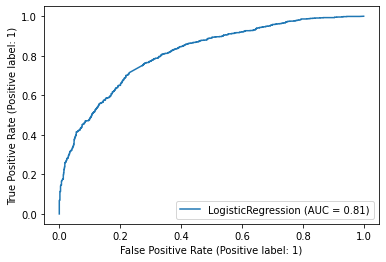

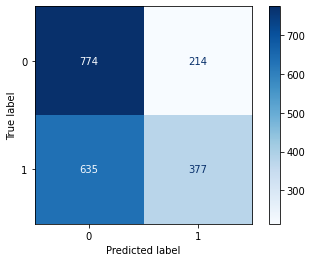

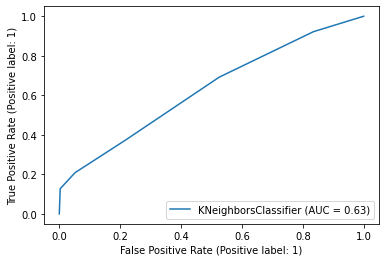

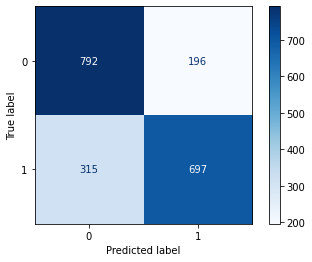

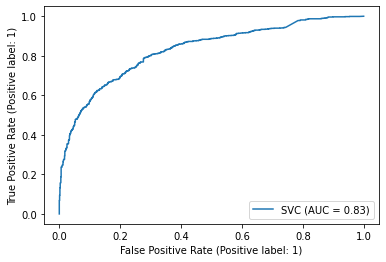

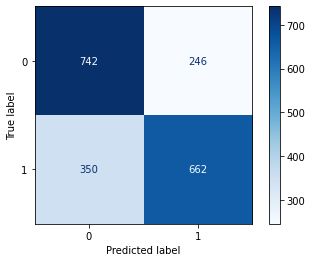

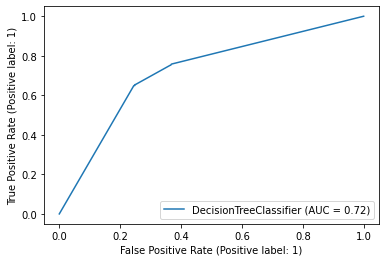

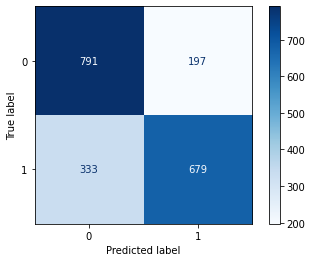

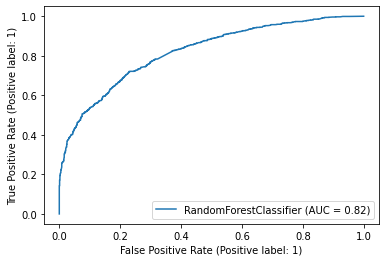

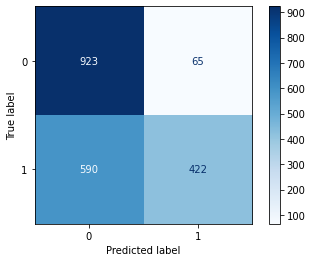

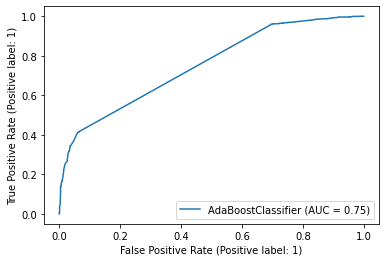

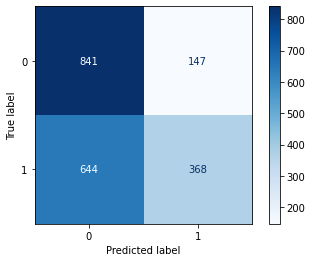

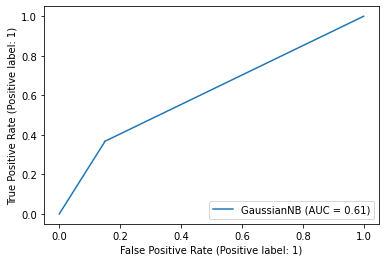

In [62]:
#Developed models using tf-idf vectorizer for feature extraction


accuracy_scores=[]
models=[]

for classifier in MLclassifiers:
    #Using sparse and dense matrix to train and test
    try:
        clf = classifier.fit(train_features,train['Sentiment'])
        pred = clf.predict(test_features)
    except Exception:
        clf = classifier.fit(dense_features,train['Sentiment'])
        pred = clf.predict(dense_test)
        
    accuracy = accuracy_score(test['Sentiment'], pred)
    accuracy_scores.append(accuracy)
    models.append(classifier.__class__.__name__)
    
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  
   
    print('Classification Report of '+classifier.__class__.__name__+"\n",classification_report(test['Sentiment'], pred))
    
    #printing accuracy scores, confusion matrix, ROC_AUC, plotting ROC curve and confusion matrix for all the developed models and tested on test set
    try:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        plot_confusion_matrix(clf, test_features, test['Sentiment'],cmap=plt.cm.Blues)
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(clf, test_features, test['Sentiment'])
    except:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        plot_confusion_matrix(clf, dense_test, test['Sentiment'],cmap=plt.cm.Blues)
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(clf, dense_test, test['Sentiment'])
    print("\n\n")

##### Hyperparameter tuning of RandomForest Classifier using GridSearchCV

In [34]:

from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
scores=['precision','recall']
for score in scores:
    
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf=GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='%s_macro' % score, cv=3 )
    clf.fit(train_features, train['Sentiment'])
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test['Sentiment'], clf.predict(test_features)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}

Grid scores on development set:

0.723 (+/-0.011) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.733 (+/-0.017) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.729 (+/-0.012) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}
0.723 (+/-0.011) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.733 (+/-0.017) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.729 (+/-0.012) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}
0.679 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.714 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

Grid scores on development set:

0.681 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.689 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.684 (+/-0.010) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}
0.681 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.689 (+/-0.009) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.684 (+/-0.010) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}
0.627 (+/-0.036) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.642 (+/-0.021) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.64

##### Using parameters determined hyperparameter tuning to train and test the model performance

0
0.743
Confusion matrix : 
[[864 124]
 [390 622]]


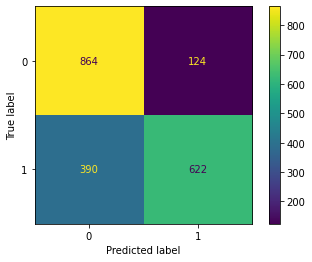

In [42]:
randomforestclf=RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=8,max_features='auto',random_state=42)
randomforestclf.fit(train_features,train['Sentiment'])
pred = randomforestclf.predict(test_features)
print(pred[1999])
accuracy = accuracy_score(test['Sentiment'], pred)
print(accuracy)
print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))

plot_confusion_matrix(randomforestclf, test_features, test['Sentiment'])

## Prediction Tool
Type a sentence to determine if it has a positive or negative sentiment

In [45]:

text="I am very sad by what I saw yesterday"
text=input("Enter a text to predict sentiment: ")


new_test_tweet=test_tweet.copy()
new_test_tweet.append(text)

vectorized_tweet= v.transform(new_test_tweet)

predictedSentiment = randomforestclf.predict(vectorized_tweet)
sentiment=predictedSentiment[2000]

if sentiment==0:
    print("negative sentiment")
else:
    print("positive sentiment")

new_test_tweet.pop()
print()

Enter a text to predict sentiment: I am very excited to graduate
positive sentiment



### Testing the Random Forest classifier model performance on collected tweets

In [46]:
collected_tweets=pd.read_csv("tweetML.csv")
collected_tweets=collected_tweets[collected_tweets['Sentiment Label']!='neutral']

collected_tweets

,Datetime,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,...,Weekday Name,date,yearMonth,compound,neg,neu,pos,cleanTweet,temp_list,Sentiment Label
0,2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,...,Friday,2021-01-22,2021-01,0.6996,0.000,0.805,0.195,ganucheauadam thank you for retweeting also i...,"['ganucheauadam', 'thank', 'retweeting', 'also...",positive
1,2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,...,Friday,2021-01-22,2021-01,-0.3382,0.138,0.862,0.000,we ve been asking for this key house leader sa...,"['asking', 'key', 'house', 'leader', 'says', '...",negative
4,2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,...,Wednesday,2020-11-18,2020-11,0.3182,0.000,0.867,0.133,jacksonstateu athletics and uhc will be provi...,"['jacksonstateu', 'athletics', 'uhc', 'providi...",positive
5,2020-11-16 23:15:57+00:00,5,1328476931952676864,Exciting! https://t.co/fPRSbRevlz,_fertileground_,"Jackson, MS",0,0,0,0,...,Monday,2020-11-16,2020-11,0.5411,0.000,0.223,0.777,exciting,['exciting'],positive
6,2020-11-12 18:21:17+00:00,6,1326953227703693313,Congrats to the team behind the Galloway Livin...,_fertileground_,"Jackson, MS",0,1,3,0,...,Thursday,2020-11-12,2020-11,0.8687,0.000,0.719,0.281,congrats to the team behind the galloway livin...,"['congrats', 'team', 'behind', 'galloway', 'li...",positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2018-08-17 13:24:33+00:00,152,1030445277185040386,#newbody #healthylifestyle #epicdanceandfitnes...,epicdanceandfit,"Ridgeland, MS",0,0,0,0,...,Friday,2018-08-17,2018-08,0.2732,0.000,0.870,0.130,newbody healthylifestyle epicdanceandfitness ...,"['newbody', 'healthylifestyle', 'epicdanceandf...",positive
130,2018-07-31 21:13:26+00:00,154,1024402681547423749,Come get healthy @epicdanceandfit \n#transform...,epicdanceandfit,"Ridgeland, MS",0,0,0,0,...,Tuesday,2018-07-31,2018-07,0.4019,0.000,0.863,0.137,come get healthy epicdanceandfit transformatio...,"['come', 'get', 'healthy', 'epicdanceandfit', ...",positive
134,2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,...,Tuesday,2018-07-17,2018-07,0.2732,0.000,0.877,0.123,transformationtuesday newbody healthylifestyl...,"['transformationtuesday', 'newbody', 'healthyl...",positive
136,2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,...,Wednesday,2018-07-11,2018-07,0.4019,0.000,0.863,0.137,postrunmeal crabsalad and sweetpotato organic...,"['postrunmeal', 'crabsalad', 'sweetpotato', 'o...",positive


##### Vectorizing the tweets

In [47]:

vectorized_tweet= v.transform(collected_tweets['cleanTweet'].values.astype('U'))


predictedSentiment = randomforestclf.predict(vectorized_tweet)
sentiment=predictedSentiment[0]

if sentiment==0:
    print("negative")
else:
    print("positive")






positive


##### Adding predicted label column in the dataframe

In [48]:
collected_tweets['Label']=collected_tweets['Sentiment Label'].apply(lambda x: 0 if x=='negative' else 1)
collected_tweets['predicted']=predictedSentiment
collected_tweets

,Datetime,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,...,yearMonth,compound,neg,neu,pos,cleanTweet,temp_list,Sentiment Label,Label,predicted
0,2021-01-22 04:12:08+00:00,0,1352469068452868103,@GanucheauAdam Thank you for retweeting! Also ...,_fertileground_,"Jackson, MS",0,0,0,0,...,2021-01,0.6996,0.000,0.805,0.195,ganucheauadam thank you for retweeting also i...,"['ganucheauadam', 'thank', 'retweeting', 'also...",positive,1,1
1,2021-01-22 01:00:14+00:00,1,1352420775530291202,We’ve BEEN asking for this!\n\nKey House leade...,_fertileground_,"Jackson, MS",0,0,0,0,...,2021-01,-0.3382,0.138,0.862,0.000,we ve been asking for this key house leader sa...,"['asking', 'key', 'house', 'leader', 'says', '...",negative,0,0
4,2020-11-18 12:44:34+00:00,4,1329042818199908353,@JacksonStateU Athletics and @UHC will be prov...,_fertileground_,"Jackson, MS",0,0,0,0,...,2020-11,0.3182,0.000,0.867,0.133,jacksonstateu athletics and uhc will be provi...,"['jacksonstateu', 'athletics', 'uhc', 'providi...",positive,1,0
5,2020-11-16 23:15:57+00:00,5,1328476931952676864,Exciting! https://t.co/fPRSbRevlz,_fertileground_,"Jackson, MS",0,0,0,0,...,2020-11,0.5411,0.000,0.223,0.777,exciting,['exciting'],positive,1,0
6,2020-11-12 18:21:17+00:00,6,1326953227703693313,Congrats to the team behind the Galloway Livin...,_fertileground_,"Jackson, MS",0,1,3,0,...,2020-11,0.8687,0.000,0.719,0.281,congrats to the team behind the galloway livin...,"['congrats', 'team', 'behind', 'galloway', 'li...",positive,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2018-08-17 13:24:33+00:00,152,1030445277185040386,#newbody #healthylifestyle #epicdanceandfitnes...,epicdanceandfit,"Ridgeland, MS",0,0,0,0,...,2018-08,0.2732,0.000,0.870,0.130,newbody healthylifestyle epicdanceandfitness ...,"['newbody', 'healthylifestyle', 'epicdanceandf...",positive,1,0
130,2018-07-31 21:13:26+00:00,154,1024402681547423749,Come get healthy @epicdanceandfit \n#transform...,epicdanceandfit,"Ridgeland, MS",0,0,0,0,...,2018-07,0.4019,0.000,0.863,0.137,come get healthy epicdanceandfit transformatio...,"['come', 'get', 'healthy', 'epicdanceandfit', ...",positive,1,0
134,2018-07-17 18:54:06+00:00,158,1019294187592802309,#transformationtuesday #newbody #healthylifest...,epicdanceandfit,"Ridgeland, MS",0,0,1,0,...,2018-07,0.2732,0.000,0.877,0.123,transformationtuesday newbody healthylifestyl...,"['transformationtuesday', 'newbody', 'healthyl...",positive,1,0
136,2018-07-11 02:06:15+00:00,160,1016866225324949505,#postrunmeal #crabsalad #and #sweetpotato #org...,SigChiPsi,"ÜT: 31.608732,-94.600016",0,0,0,0,...,2018-07,0.4019,0.000,0.863,0.137,postrunmeal crabsalad and sweetpotato organic...,"['postrunmeal', 'crabsalad', 'sweetpotato', 'o...",positive,1,0


##### Accuracy on collected tweets

0.6228070175438597


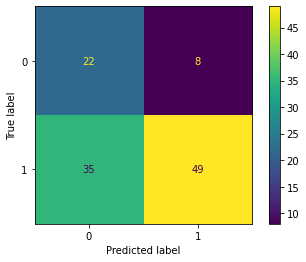

In [49]:


plot_confusion_matrix(randomforestclf, vectorized_tweet, collected_tweets['Label'])

accuracy = accuracy_score(collected_tweets['Label'], predictedSentiment)
print(accuracy)


In [ ]:
#Hyperparameter tuning for feature extracted using tf-idf vectorizer

from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
scores=['precision','recall']
for score in scores:
    
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf=GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='%s_macro' % score, cv=3 )
    clf.fit(train_features, train['Sentiment'])
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test['Sentiment'], clf.predict(test_features)
    print(classification_report(y_true, y_pred))
    print()